In [29]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import missingno as msno
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
import datetime
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv(r'C:\Users\Zehra\Downloads\Admission_Predict_Ver1.1.csv')
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [3]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [6]:
data.drop(columns='Serial No.', axis=1, inplace=True)

In [7]:
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [8]:
data.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [10]:
data[data.duplicated()]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


In [ ]:
Drop serial number column
describe
missing values
duplicates
outliers
distrubution
data inconsist
visualisations
corelations
linearity( LR)
encoding?
stand/ normalisation

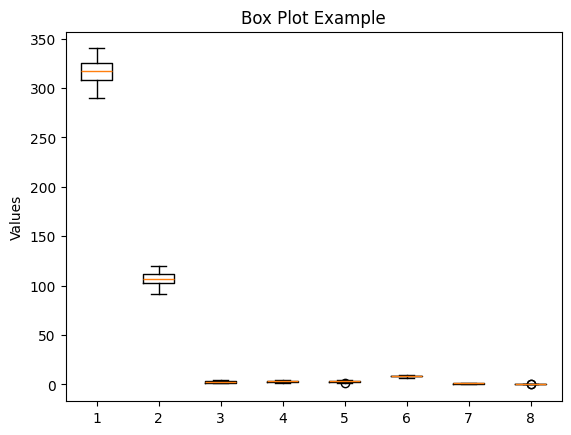

In [11]:
plt.boxplot(data)
plt.title("Box Plot Example")
plt.ylabel("Values")
plt.show()

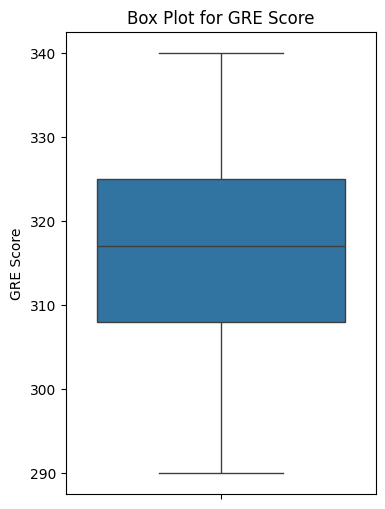

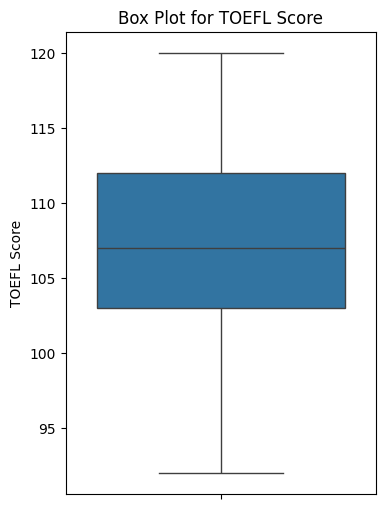

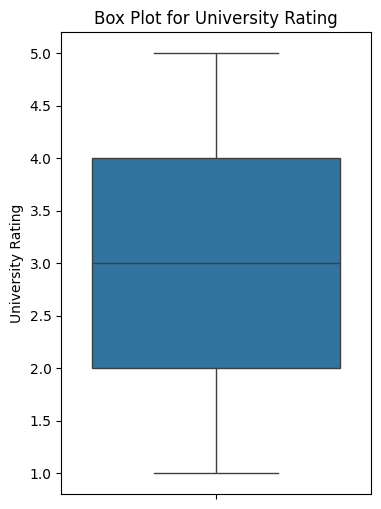

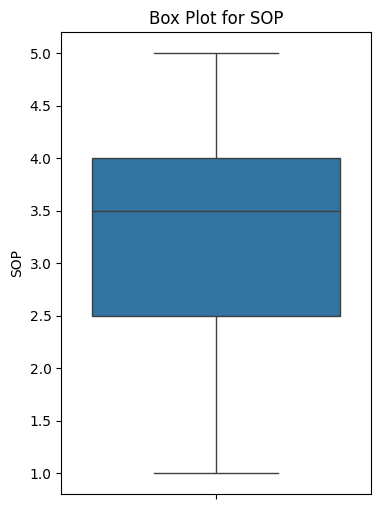

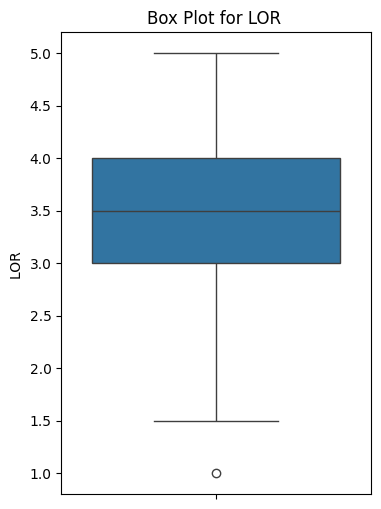

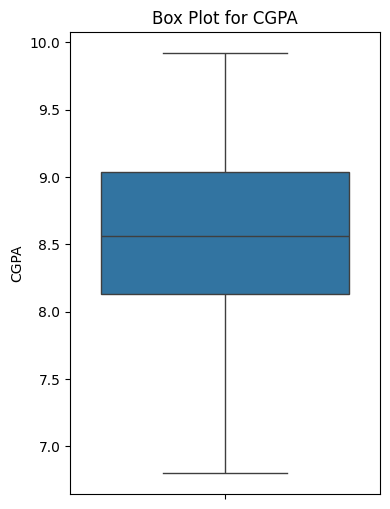

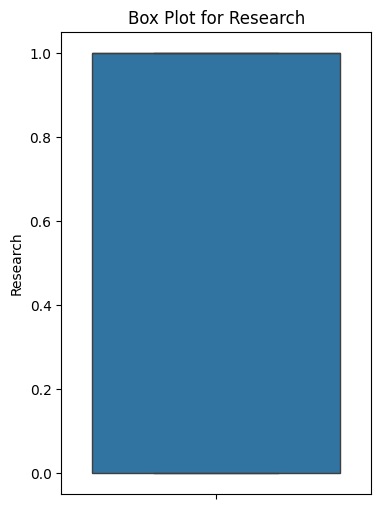

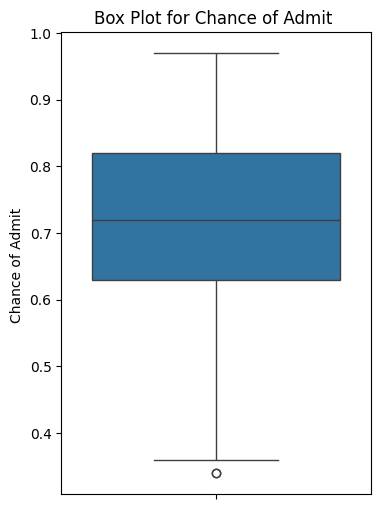

In [12]:
for col in data.columns:
    plt.figure(figsize=(4, 6))
    sns.boxplot(y=data[col])
    plt.title(f'Box Plot for {col}')
    plt.ylabel(col)
    plt.show()

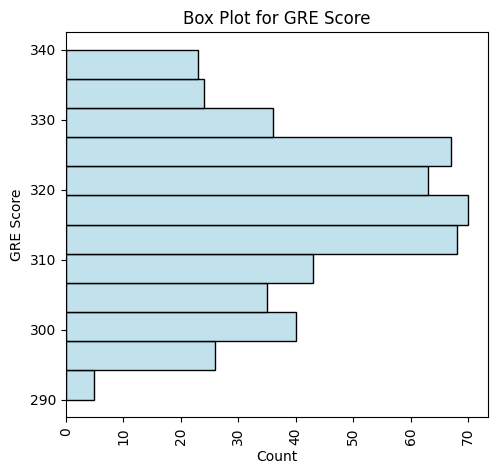

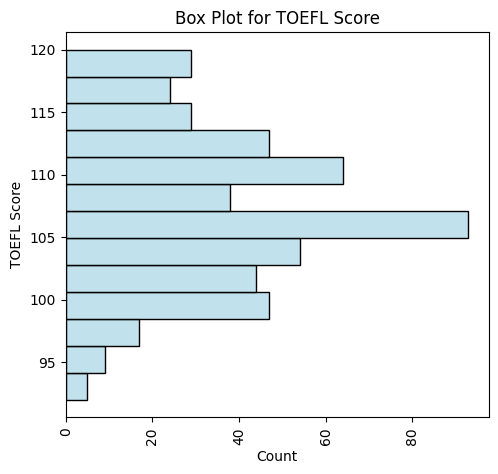

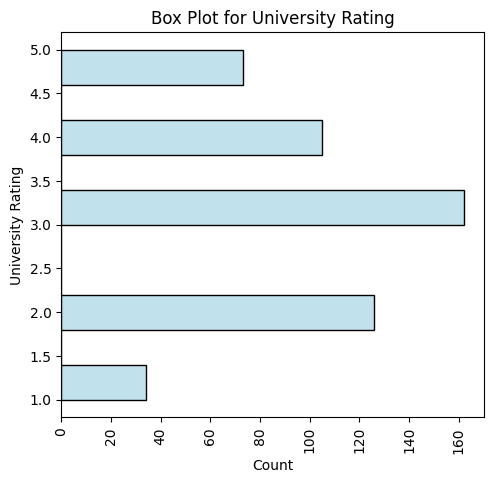

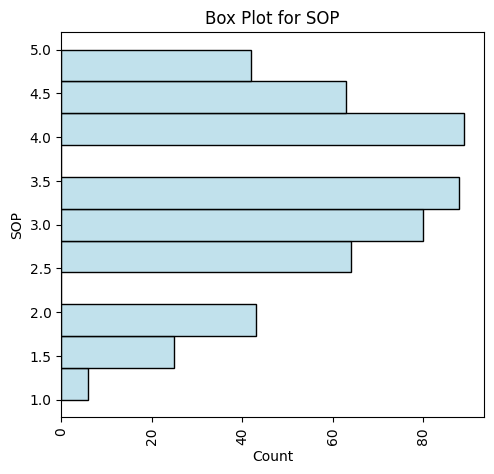

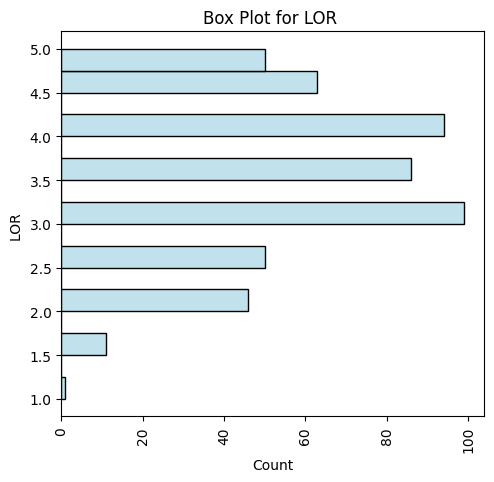

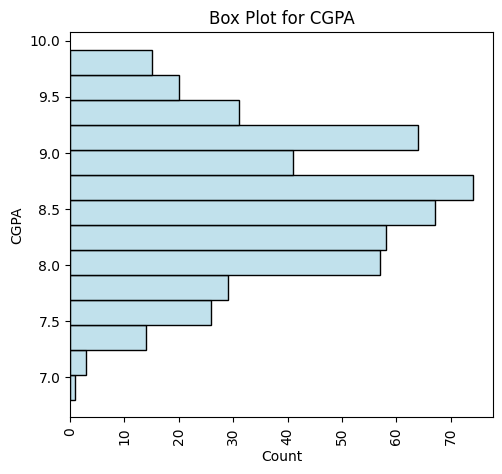

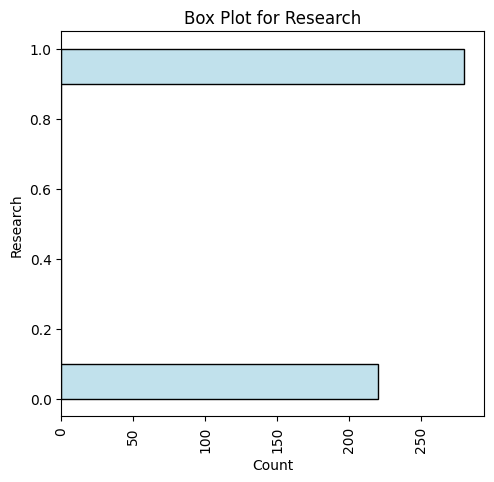

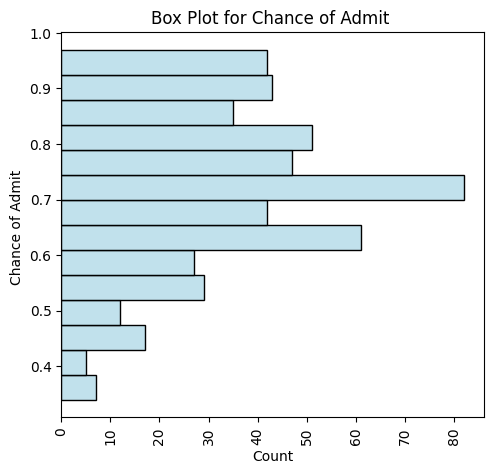

In [20]:
for col in data.columns:
    plt.figure(figsize=(12, 5))

    # Box Plot
    plt.subplot(1, 2, 1)
    sns.histplot(y=data[col], color='lightblue')
    plt.title(f'Box Plot for {col}')
    plt.ylabel(col)
    plt.xticks(rotation=90)

In [19]:
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


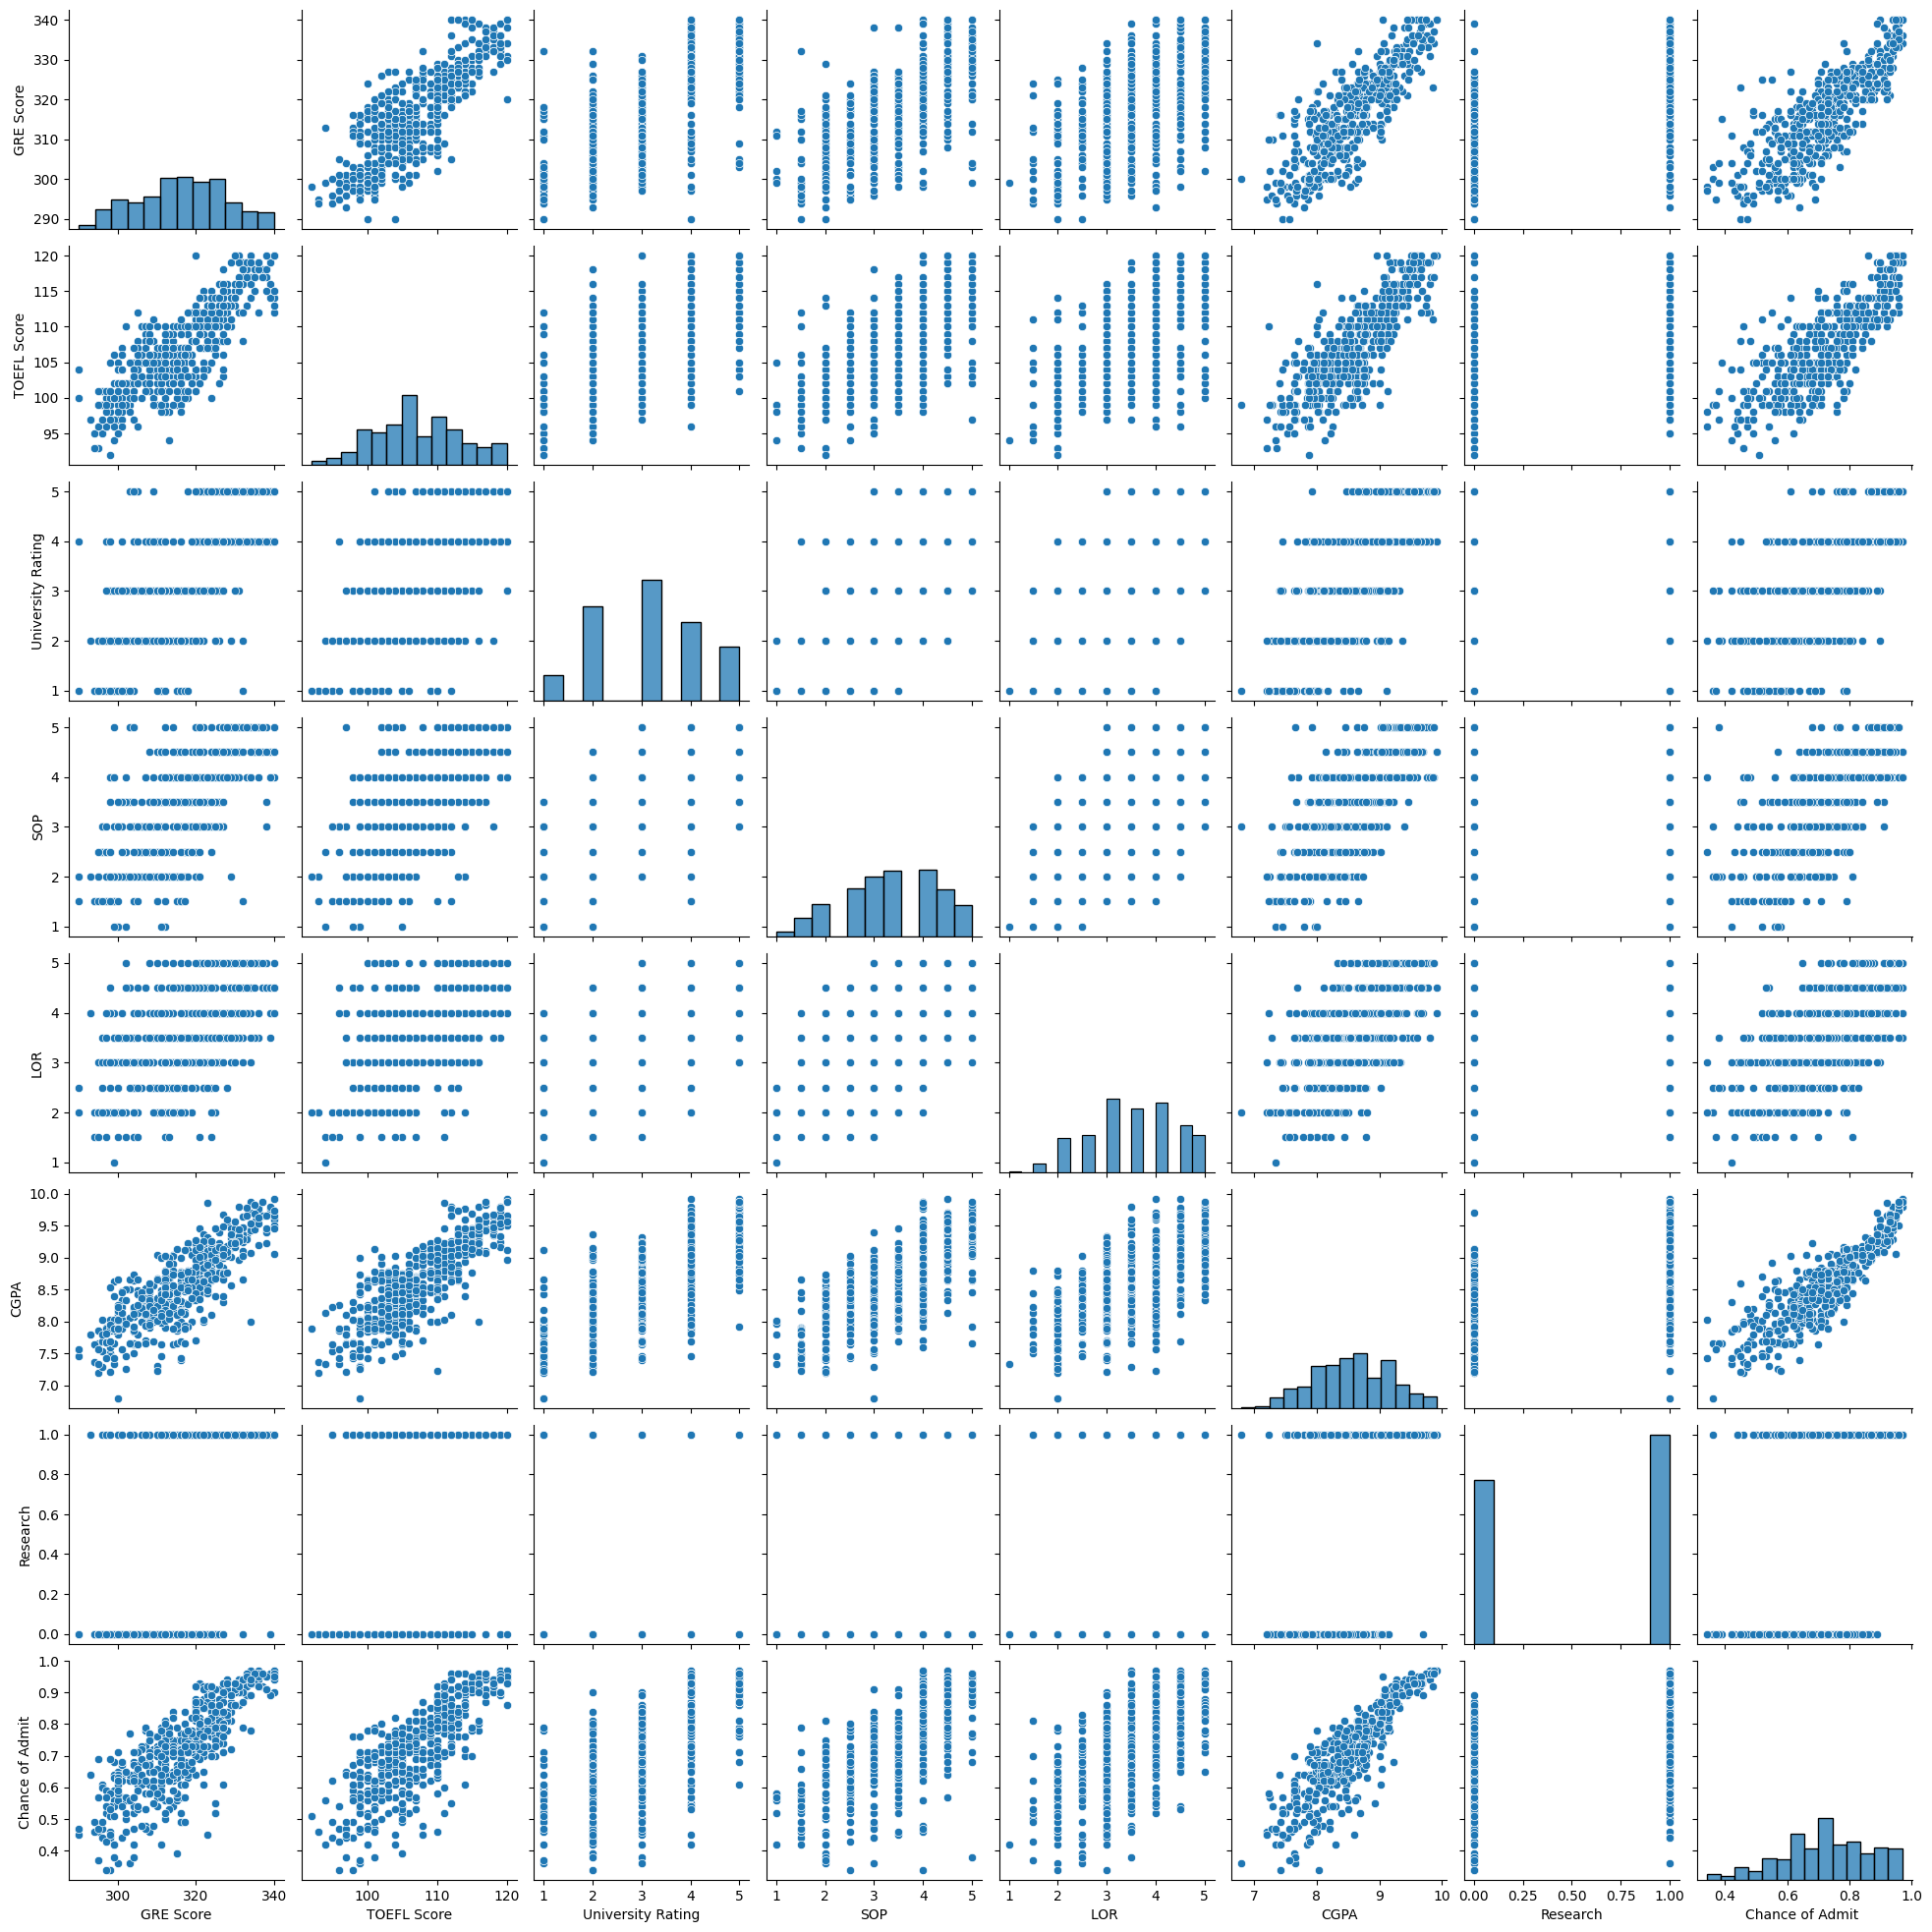

In [21]:
sns.pairplot(data=data)

In [24]:
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


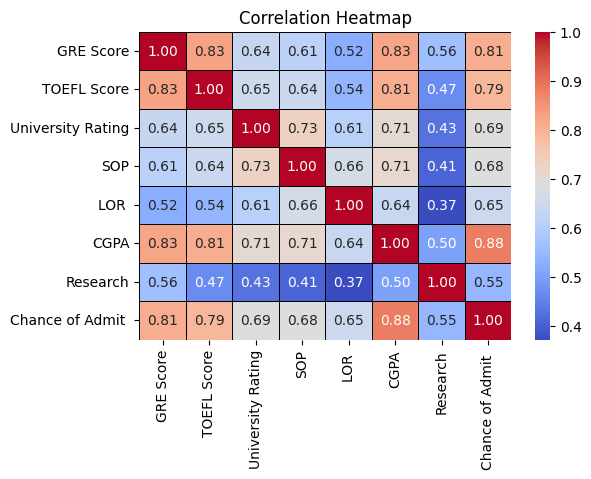

In [25]:
plt.figure(figsize=(6, 4))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.title("Correlation Heatmap")
plt.show()

In [30]:
min_max = MinMaxScaler()
data_minmax = min_max.fit_transform(data)



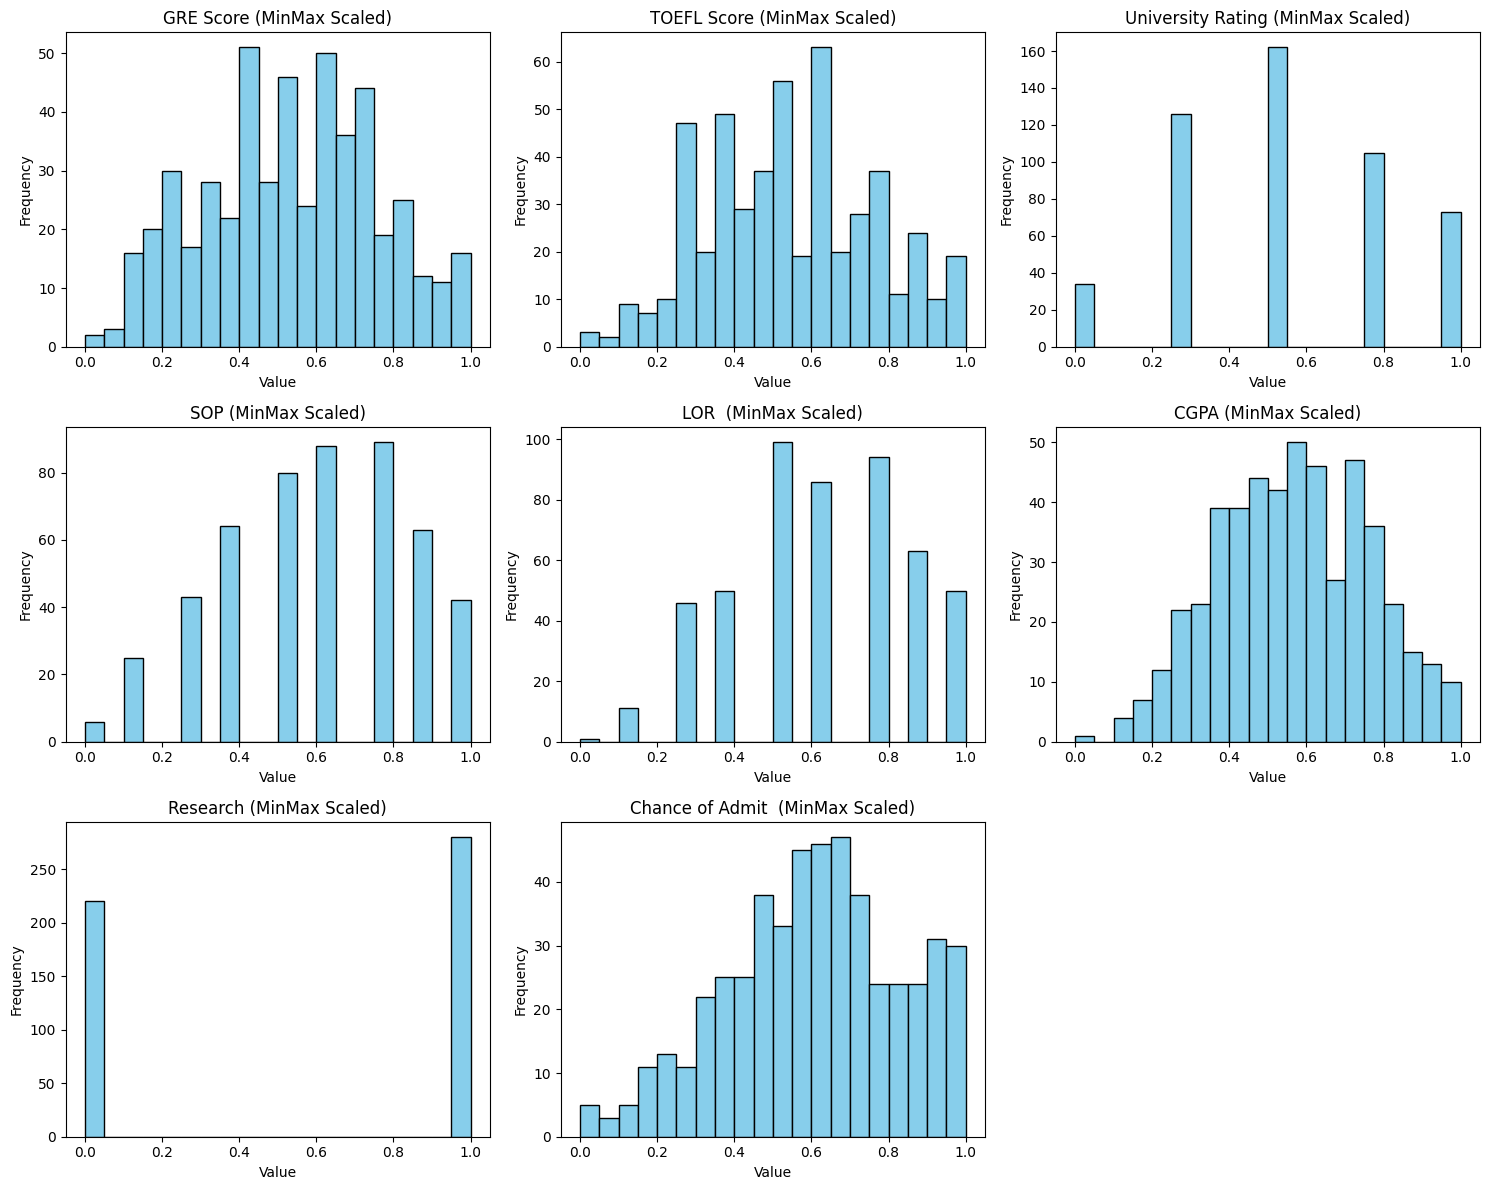

In [38]:
data_minmax_df = pd.DataFrame(data_minmax, columns=data.columns)
num_cols = len(data.columns)
rows = int(np.ceil(num_cols / 3))

fig, axs = plt.subplots(rows, 3, figsize=(15, 4 * rows))
axs = axs.flatten()

for i, col in enumerate(data_minmax_df.columns):
    axs[i].hist(data_minmax_df[col], bins=20, color='skyblue', edgecolor='black')
    axs[i].set_title(f'{col} (MinMax Scaled)')
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')

# Turn off any unused subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


In [35]:

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_minmax)

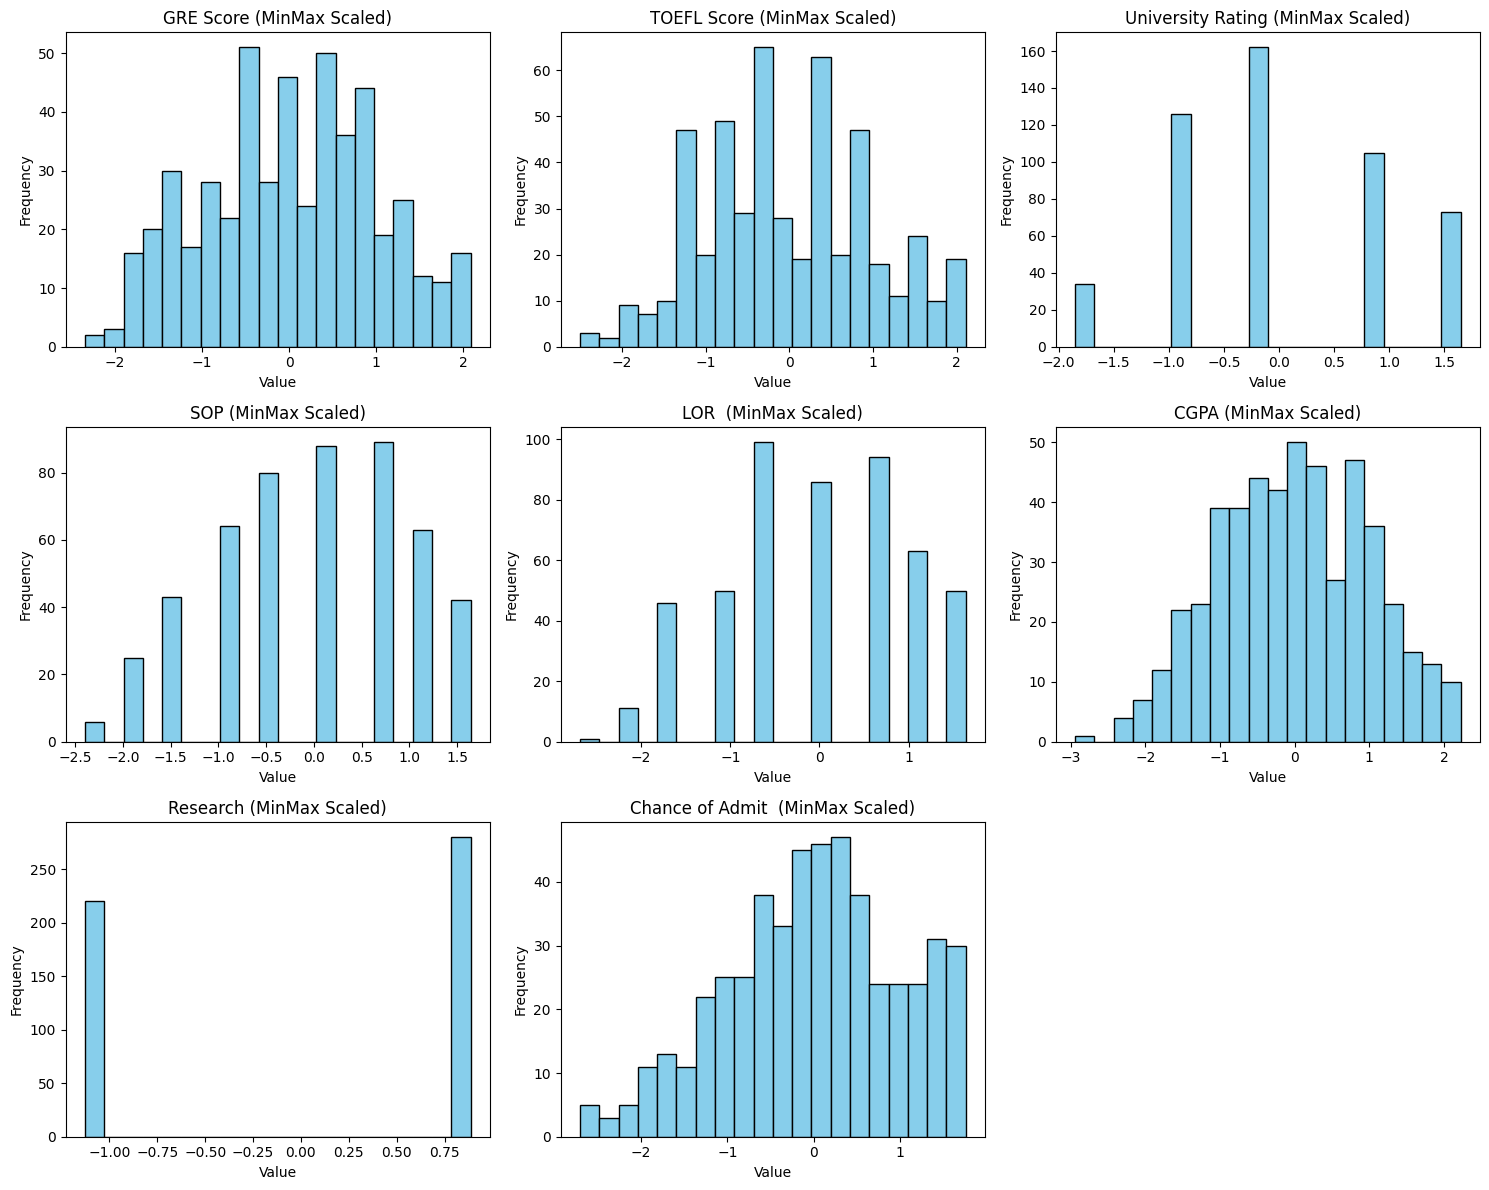

In [41]:
data_scaled_df = pd.DataFrame(data_scaled, columns=data.columns)
num_cols = len(data.columns)
rows = int(np.ceil(num_cols / 3))

fig, axs = plt.subplots(rows, 3, figsize=(15, 4 * rows))
axs = axs.flatten()

for i, col in enumerate(data_scaled_df.columns):
    axs[i].hist(data_scaled_df[col], bins=20, color='skyblue', edgecolor='black')
    axs[i].set_title(f'{col} (MinMax Scaled)')
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')

# Turn off any unused subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

In [48]:
X = data_scaled_df.drop("Chance of Admit ", axis=1)

In [52]:
y = data_scaled_df["Chance of Admit "]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)